# 1 Intro to Computer Vision (CV)
Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs

Utilizes Deep learning and convolutional neural network (CNN).

A CNN helps a machine learning or deep learning model “look” by breaking images down into pixels that are given tags or labels.

Example CV tasks:
- Image classification
- Object detection
- Object tracking: This task is often executed with images captured in sequence or real-time video feeds. eg: autonomous vehicles
- Content-based image retrieval: browse, search and retrieve images from large data stores, based on the content of the images rather than metadata tags.



sources:
- https://www.ibm.com/topics/computer-vision
- https://datagen.tech/guides/computer-vision/algorithms/

# 2 Look at The Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
per_df = pd.read_csv('/content/drive/MyDrive/Week12/performance_data.csv')
per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [6]:
per_df.head(5)

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


**Engagement Rate (ER)** - the number of engagements divided by the number of impressions

**Click Through Rate (CTR)** - the number of clicks divided by the number of engagements

**Video Through Rate (VTR)** - the number of videos ends divided by the number of engagements

In [7]:
per_df.loc[0].preview_link

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/bfbf7a2b7ac635e67877b1ab87fd6629/b7a604b3b08f0862ef0e/index.html'

# 3 Locating Assets within Creative

In [15]:
import cv2
import matplotlib.pyplot as plt

In [9]:
def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)

{'eng_top_left_pos': (262, 746), 'eng_bottom_right_pos': (352, 854)}

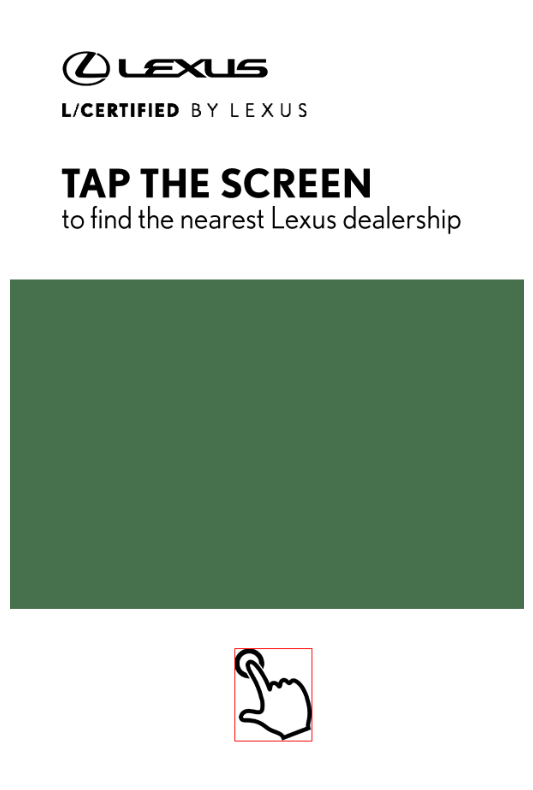

In [16]:
locate_image_on_image(
    '/content/drive/MyDrive/Week12/Asserts/fef95c5e1ee5bc235b56d7c508d3bcd0/engagement_animation.png', '/content/drive/MyDrive/Week12/Asserts/fef95c5e1ee5bc235b56d7c508d3bcd0/_preview.png', prefix='eng_', visualize=True)


{'eng_top_left_pos': (262, 746), 'eng_bottom_right_pos': (352, 854)}

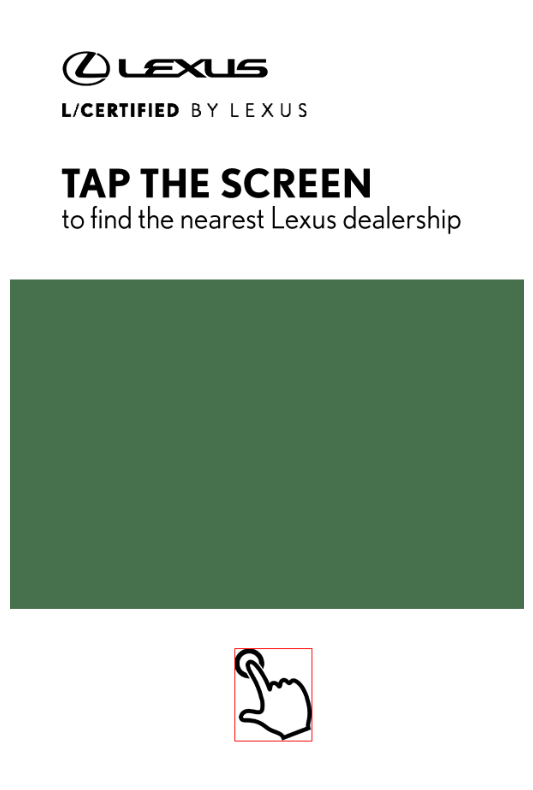

In [19]:
locate_image_on_image(
    '/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/engagement_animation.png', '/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/_preview.png', prefix='eng_', visualize=True)

> What features can be Extracted from Locating Assets ?
- Size
- Ratio
- Total Covered Area
- and more ...

# 4 Futher examples of CV

If you want to further enrich the data

## 4.1 Extracting Colors

In [25]:
!pip install extcolors
!pip install colormap

  Using cached extcolors-1.0.0-py3-none-any.whl (9.8 kB)
  Using cached convcolors-2.2.0-py3-none-any.whl (3.8 kB)


In [26]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image

In [27]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 2,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df


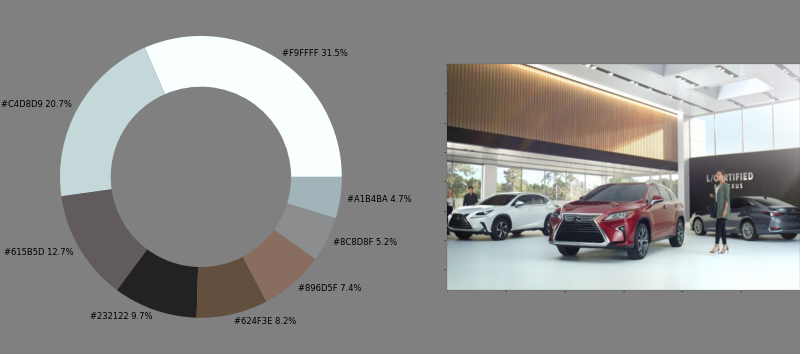

,c_code,rgb,occurrence
0,#F9FFFF,"(249, 255, 255)",61593
1,#C4D8D9,"(196, 216, 217)",40416
2,#615B5D,"(97, 91, 93)",24738
3,#232122,"(35, 33, 34)",18858
4,#624F3E,"(98, 79, 62)",16002
5,#896D5F,"(137, 109, 95)",14425
6,#8C8D8F,"(140, 141, 143)",10134
7,#A1B4BA,"(161, 180, 186)",9249


In [28]:
identify_color_composition('/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/landing_2.jpg',tolerance=12,limit=8, visualize=True)

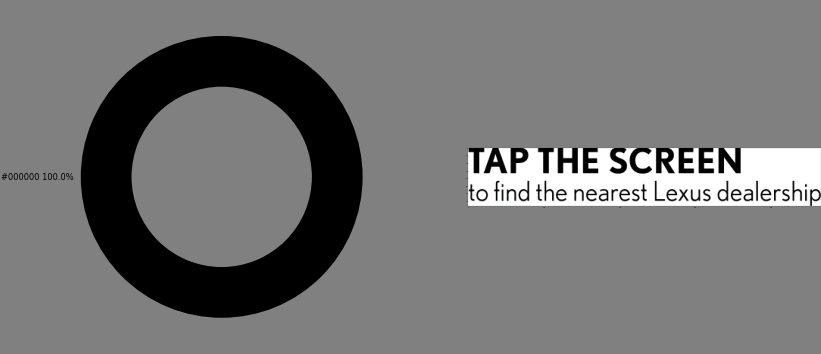

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",10167


In [29]:
identify_color_composition(
    '/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/engagement_instruction.png', visualize=True)

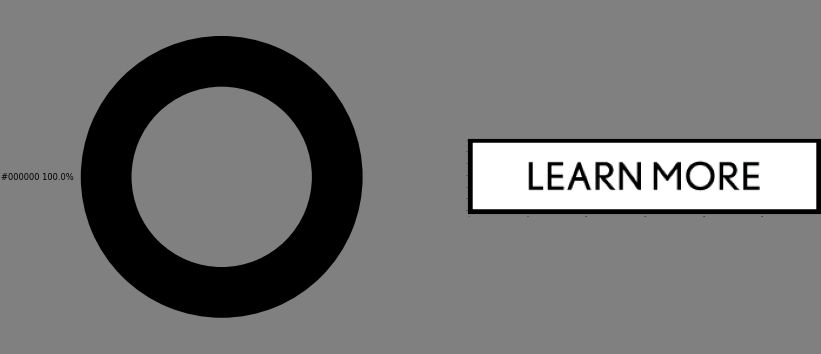

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",4975


In [30]:
identify_color_composition(
    '/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/cta.png', limit=3 ,visualize=True)

> What features can be Extracted from Color ?
- Number of Colors used
- Background Color
- Text Color
- Contrast, Saturation, ...
- and more ...

## 4.2 Object Detection with YOLO

YOLO (You Only Look Once) is a CV object detection algorithm.

YOLO was designed to efficiently and simultaneously perform object detection and classification in real-time on a single pass through an image

In [23]:
import torch

In [53]:
%cd yolov7
! python detect.py --weights yolov7-tiny.pt --conf 0.4 --img-size 1280 --source /content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/_preview.png --project trial --name run
%cd ..

[Errno 2] No such file or directory: 'yolov7'
/
python3: can't open file '//detect.py': [Errno 2] No such file or directory
/


> What features can be Extracted from Object Detection ?
- Object Detected
- Number of Objects Detected
- and more ...

## 4.3 Extracting Text

In [31]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,751 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [32]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [33]:
def convert_hex_to_rgb(hex_color: str, normalize: bool = True) -> List[str]:
    """Converts a HEX color to a RGB color

    Args:
        hex_color (str): HEX color code to convert
        normalize (bool, optional): Choice to normalize calculated rgb values . Defaults to True.

    Returns:
        List[str]: List of RGB values in order, normalized or not.
    """
    colors = hex_color[1:]

    # Convert HEX color values to RGB Values
    colors = [int(colors[0:2], base=16),  # RED
              int(colors[2:4], base=16),  # GREEN
              int(colors[4:6], base=16)]  # BLUE

    # Normalize RGB values
    if normalize:
        colors = [color / 255 for color in colors]

    return colors

def get_luminance(hex_color: str) -> float:
    """Calculates the luminance of a given HEX color

    Args:
        hex_color (str): HEX color code to calculate luminance for

    Returns:
        float: luminance value of color
    """
    colors = convert_hex_to_rgb(hex_color)

    luminance = colors[0] * 0.2126 + colors[1] * 0.7152 + colors[2] * 0.0722

    return luminance

def fix_image_background(image_path: str):
    identified_colors = identify_color_composition(image_path)
    text_color = identified_colors['c_code'].to_list()[0]
    text_color_rgb = identified_colors['rgb'].to_list()[0]
    luminance = get_luminance(hex_color=text_color)

    if luminance < 140:
        background_color = (255, 255, 255)
    else:
        background_color = (0, 0, 0)

    # Load image
    image = cv2.imread(image_path)

    # Make all perfectly green pixels white
    image[np.all(image != text_color_rgb, axis=-1)] = background_color

    return image

def extract_text(image_path, tesseract_cmd: str = '', fix_background: bool = False):
    # pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
    try:
        if fix_background:
            text = pytesseract.image_to_string(
                fix_image_background(image_path))
        else:
            text = pytesseract.image_to_string(image_path)

        return text

    except pytesseract.TesseractNotFoundError:
        raise Exception(
            f'Failure: Tesseract is not installed or not available in the defined path {tesseract_cmd}')

In [34]:
extract_text('/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/_preview.png')

'Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN\n\nto find the nearest Lexus dealership\n\n(iF\n\x0c'

In [35]:
extract_text('/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/engagement_instruction.png', fix_background=True)

'TAP THE SCREEN\n\nto find the nearest Lexus dealership\n\x0c'

In [36]:
extract_text('/content/drive/MyDrive/Week12/Asserts/ff72b5f704ef2a8fa05e5a7b350a1e8e/cta.png', fix_background=True)

'LEARN MORE\n\x0c'

> What features can be Extracted from Text ?
- Number of Characters
- Number of Words
- ...

# 5 Extra: How the Archive data was created


#### Extracting Start Frame and End Frame or Preview Video of a Creative

> We can use Selenium to Load the creative on a automated browser follow its progression and capture screenshots at certain moments or Record the entire creative.

In [42]:
!pip install selenium

In [51]:
!pip install pyautogui

In [44]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=1cfe2e53bc6a8e5e3283c5d372f7cc49e28ff8306c5e38d4d09c999f1153a68f
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [52]:
# Imports
from typing import Tuple
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from os import path
from subprocess import Popen, call
import pyautogui
import ffmpeg # library used for audio & videw processing and gerneration

KeyError: 'DISPLAY'

In [ ]:
class CreativeFrameExtractor:
    '''
    Class responsible for Extracting Creative Start and End Frames.
    It requires a chrome webdriver compatible with selenium to be
    installed/included in the run environment path.
    '''

    def __init__(self, preview_url: str,
                 engagement_type: str,
                 save_location: str = '',
                 browser_edges: Tuple[float, float] = (70, 1039)) -> None: # crop the image

        self.preview_url = preview_url
        self.engagement_type = engagement_type
        self.browser_edges = browser_edges
        self.file_name = '-'.join(preview_url.split('/')[-3:-1]) # extracting the file name from url
        self.save_location = save_location
        self.video_name = path.join(self.save_location, self.file_name) # video name
        self.cmd = f"ffmpeg -f gdigrab -draw_mouse 0 -framerate 60 -i desktop -vcodec libx264rgb {self.video_name}.mkv -y"

        # Configurations # of the selenium

        # Browser Configuration
        # Browser Options
        self.opt = Options()
        self.opt.add_argument("--hide-scrollbars")
        self.opt.add_experimental_option(
            "excludeSwitches", ["enable-automation"])
        # Browser Logs # If you want to extract browser logs
        self.capabilities = DesiredCapabilities.CHROME
        self.capabilities["goog:loggingPrefs"] = {"browser": "ALL"}

    def is_status_complete(self, passed_driver) -> bool:
        '''
        Function to check status of the AD-Unit and its completion. #different phases of AD
        # we use this to track when to get the end/start frame, start/end of recording
        '''
        # Retrieve logs from browser
        logs = passed_driver.get_log("browser")

        for log in logs:
            # Select logs coming from AD-Unit
            if log["source"] == "console-api":
                # Extract message from log
                message = log["message"]

                if '"GAME CREATED"' in message or '"DROPPED"' in message:
                    # Start Recording Game
                    print("Starting Recording AD-UNIT...")
                    print(log)
                    return False

                if '"START"' in message:
                    # Engaged
                    print("AD-UNIT Engaged...")
                    print(log)
                    return False

                if '"GAME COMPLETE"' in message:
                    # Stop Recording Game
                    print("Stopped Recording AD-UNIT...")
                    print(log)
                    return True

        return False

    @staticmethod
    def terminate(process: Popen[bytes]) -> None:
        '''
        Function to stop/terminate a process.
        '''
        # Video Recording Process Terminator
        if process.poll() is None:
            call("taskkill /F /T /PID " + str(process.pid))

    @staticmethod
    def crop_video(filename: str, x_pos: float = 0, y_pos: float = 70, width: float = 650, height: float = 970) -> None:
        '''
        Function to crop a video with given location and size specific parameters. # we need this because the record function records entire screen
        '''
        print(filename)
        input_video = ffmpeg.input(f"{filename}.mkv")
        cropped_video = ffmpeg.crop(input_video, x_pos, y_pos, width, height)
        output_video = ffmpeg.output(cropped_video, f"{filename}_cropped.mkv")
        ffmpeg.run(output_video)

    def _imitate_engagement(self, ad_size: Tuple[float, float]) -> None:
        '''
        Function to imitate a given engagement type. # are these comprehensive?
        '''
        center = (ad_size[0]/2, self.browser_edges[0] + (ad_size[1]/2))

        if self.engagement_type == "tap":
            pyautogui.moveTo(center[0], center[1], duration=1)
            pyautogui.leftClick()

        elif self.engagement_type == "swipe right":
            pyautogui.moveTo(center[0], center[1], duration=1)
            pyautogui.dragRel(center[0], 0, duration=1)

        elif self.engagement_type == "swipe left":
            pyautogui.moveTo(center[0], center[1], duration=1)
            pyautogui.dragRel(-center[0], 0, duration=1)

        elif self.engagement_type == "tap and hold":
            pyautogui.moveTo(center[0], center[1], duration=1)
            pyautogui.click()

        elif self.engagement_type == "scrub":
            pyautogui.moveTo(center[0] - (1/2 * center[0]),
                             center[1] - (2/3 * center[1]), duration=0.2)
            pyautogui.dragRel(center[0], 0, duration=0.2)
            pyautogui.dragRel(-center[0], (1/3 * center[1]), duration=0.2)
            pyautogui.dragRel(center[0], 0, duration=0.2)
            pyautogui.dragRel(-center[0], (1/3 * center[1]), duration=0.2)
            pyautogui.dragRel(center[0], 0, duration=0.2)

    def generate_preview_video(self) -> None:
        '''
        Function to generate preview video and also a cropped version of the video.
        '''
        # Initialize Selenium WebDriver
        driver = webdriver.Chrome(
            options=self.opt, desired_capabilities=self.capabilities)
        # Maximize WebDriver's Window to Maximum Size
        driver.maximize_window()

        try:
            # Load AD-Unit through Selenium
            driver.get(self.preview_url)

            # Locate AD-Unit Element from Browser
            canvas = driver.find_element(By.TAG_NAME, "canvas")

            # Start Recording Entire Screen
            video_recording = Popen(self.cmd)

            # Identify Size of AD-Unit
            ad_size = (canvas.size.get("width"), canvas.size.get("height"))

            # Engage Ad-Unit
            self._imitate_engagement(ad_size)

            # Continuously Check Status of AD-Unit using its console logs
            # until it reached a "GAME COMPLETE" Status
            WebDriverWait(driver, 100).until(self.is_status_complete)

            sleep(5)

            # Stop Video Recording
            self.terminate(video_recording)

            # Close Selenium Browser Window
            driver.close()

            # Crop Generated Preview Video Recording
            self.crop_video(self.video_name, x_pos=0, y_pos=70,
                            width=ad_size[0], height=ad_size[1])

        except TimeoutException:
            print("TimeOut Exception Fired")
            print("AD-Unit Status Console Logs did not Complete. Engagement Failed.")
            driver.close()

        except NoSuchElementException:
            print(f"AD-Unit Failed to Load: {self.preview_url}")
            driver.close()

    def generate_frames(self) -> None:
        '''
        Function to generate creative start and end frames.
        '''
        # Initialize Selenium WebDriver
        driver = webdriver.Chrome(
            options=self.opt, desired_capabilities=self.capabilities, )
        # Maximize WebDriver's Window to Maximum Size
        driver.maximize_window()

        try:
            # Load AD-Unit through Selenium
            driver.get(self.preview_url)

            # Locate AD-Unit Element from Browser
            canvas = driver.find_element(By.TAG_NAME, "canvas")

            # Capture Start Frame
            canvas.screenshot(
                path.join(self.save_location, f'{self.file_name}_start_frame.png'))
            print('Start Frame captured')

            # Identify Size of AD-Unit
            ad_size = (canvas.size.get("width"), canvas.size.get("height"))

            # Engage Ad-Unit
            self._imitate_engagement(ad_size)

            # Continuously Check Status of AD-Unit using its console logs
            # until it reached a "GAME COMPLETE" Status
            WebDriverWait(driver, 100).until(self.is_status_complete)

            sleep(5)

            # Capture End Frame
            canvas.screenshot(path.join(self.save_location,f'{self.file_name}_end_frame.png'))
            print('End Frame Captured')

            # Close Selenium Browser Window
            driver.close()

        except TimeoutException:
            print("TimeOut Exception Fired")
            print("AD-Unit Status Console Logs did not Complete. Engagement Failed.")
            driver.close()

        except NoSuchElementException:
            print(f"AD-Unit Failed to Load: {self.preview_url}")
            driver.close()


In [ ]:
# Creating Extractor Object
ext = CreativeFrameExtractor(
    'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/5a48ffcbf611f167ecbb884e807f31f6/7e6dcb347f24c7843a8d/index.html', 'tap', save_location='./extracted_images/')

In [ ]:
# Calling Generate Frames from Extractor Object
ext.generate_frames()

Start Frame captured
Starting Recording AD-UNIT...
{'level': 'INFO', 'message': 'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/5a48ffcbf611f167ecbb884e807f31f6/7e6dcb347f24c7843a8d/index.html 19:16 "GAME CREATED"', 'source': 'console-api', 'timestamp': 1667296715850}
Stopped Recording AD-UNIT...
{'level': 'INFO', 'message': 'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/5a48ffcbf611f167ecbb884e807f31f6/7e6dcb347f24c7843a8d/index.html 22:16 "GAME COMPLETE"', 'source': 'console-api', 'timestamp': 1667296733849}
End Frame Captured


In [ ]:
# Calling Generate Preview Video from Extractor Object
ext.generate_preview_video()